In [1]:
from IPython.display import HTML

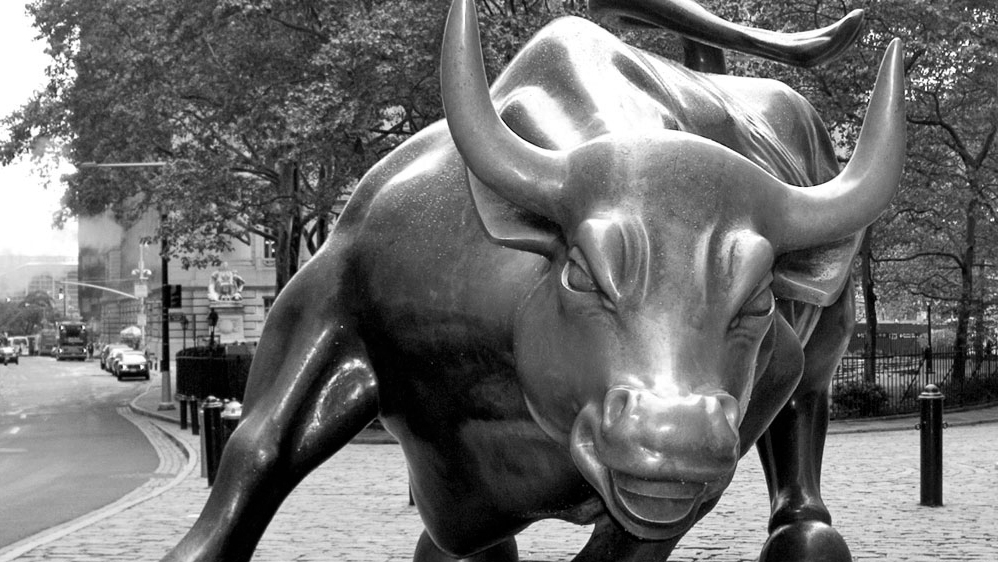

In [2]:
from IPython.display import Image
Image("stock_bull.png")

Portland Data Science Group: Stock Market Project
=======================

**By: Pieter Leffers**

*Starting Date: March 4, 2018*

*Completion Date: April 1st, 2018* 

Project Description
-----------

Driven by popular demand this project is a sequal to a previous attempt for the Portland Data Science Group to explore the stock market data. This time there was a twist, the regular attendees and members who enjoyed the previous exploration were seperated into two groups and were charged with competing against each other over who can predict the stock market the best.

More specifically, regular participants were seperated into two competing categories; Neural Networks models versus Non-Neural Network models. The prediction we were charged with was to see if stocks and economic indicators (housing,unemployment,etc) could be used to predict Exchange Traded Funds as well as the Russel 3000 from the second Quarter of 2018 to March 13. Then we will apply the best model to forecast from Friday March 16 to Friday June 15.


**Group Participants:**
- Pieter Leffers (Myself)
- Isil Berkun
- John Burt
- Mark Chesney
- Matt Cooper
- Kenny Liao
- John Mackrory
- Dipti Muni
- Manny Muro
- Jhoan Perras

Data Source(s):
    ---------

In [3]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [196]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from scipy import stats 
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle

Stage 1: Setting Up / Cleaning Data
======

Stocks Setup
--------------

**Closing**


*Definition:*
The amended closing price of a stock on any regular trading day, due to corporate actions such as splits, dividends, distributions and new offerings prior to the follow trading day's open, to rectify gapped prices and to present a clearer historical representation of the company's equity value.


In [197]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
closingStocks=pd.read_csv(File_Location+'stocks-us-adjClose.csv',parse_dates=True,dayfirst=True,na_values=".")

#Rename first Row
closingStocks.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "Date"}, inplace=True)

#Set Date column
closingStocks['Date'] = pd.to_datetime(closingStocks['Date'], format = '%Y-%m-%d',  errors='coerce')

In [198]:
#Create new column names so that we can distinguish the different types of stock data
#This operation will take a minute or two

#This iterates over all columns of the dataset and appends a string to the name 
#   in order to designate which stock values it is associated with 
for i in closingStocks.columns:
    closingStocks.rename(index=str, columns={i:i+'-Close'}, inplace=True)
#Re-authoring the time element. This will be used in the future for merging.    
closingStocks.rename(index=str, columns={'Date-Close': 'Date'},inplace=True)

**High**

*Definition*: the highest price in a given period of time.

In [199]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
highStocks=pd.read_csv(File_Location+'stocks-us-adjHigh.csv',parse_dates=True,dayfirst=True,na_values=".")
#Rename first Row
highStocks.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "Date"}, inplace=True)
#Set Date column
highStocks['Date'] = pd.to_datetime(highStocks['Date'], format = '%Y-%m-%d',  errors='coerce')

In [200]:
#Create new column names so that we can distinguish the different types of stock data
#This operation will take a minute or two
for i in highStocks.columns:
    highStocks.rename(index=str, columns={i:i+'-High'}, inplace=True)
highStocks.rename(index=str, columns={'Date-High': 'Date'},inplace=True)

**Low**

*Definition*: the lowest price in a given period of time.

In [201]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
lowStocks=pd.read_csv(File_Location+'stocks-us-adjLow.csv',parse_dates=True,dayfirst=True,na_values=".")
#Rename first Row
lowStocks.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "Date"}, inplace=True)
#Set Date column
lowStocks['Date'] = pd.to_datetime(lowStocks['Date'], format = '%Y-%m-%d',  errors='coerce')

In [202]:
#Create new column names so that we can distinguish the different types of stock data
#This operation will take a minute or two
for i in lowStocks.columns:
    lowStocks.rename(index=str, columns={i:i+'-Low'}, inplace=True)
lowStocks.rename(index=str, columns={'Date-Low': 'Date'},inplace=True)

**Open**

*Definition*: The opening price is the price at which a security first trades upon the opening of an exchange on a given trading day


In [203]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
openStocks=pd.read_csv(File_Location+'stocks-us-adjOpen.csv',parse_dates=True,dayfirst=True,na_values=".")
#Rename first Row
openStocks.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "Date"}, inplace=True)
#Set Date column
openStocks['Date'] = pd.to_datetime(openStocks['Date'], format = '%Y-%m-%d',  errors='coerce')

In [204]:
#Create new column names so that we can distinguish the different types of stock data
#This operation will take a minute or two
for i in openStocks.columns:
    openStocks.rename(index=str, columns={i:i+'-Open'}, inplace=True)
openStocks.rename(index=str, columns={'Date-Open': 'Date'},inplace=True)

**Volume**

*Definition*: The amount of shares bought and sold of a stock in a given period of time. It is important because the more volume the more people agree with the price of the stock.

In [205]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
volStocks=pd.read_csv(File_Location+'stocks-us-Volume.csv',parse_dates=True,dayfirst=True,na_values=".")
#Rename first Row
volStocks.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "Date"}, inplace=True)
#Set Date column
volStocks['Date'] = pd.to_datetime(volStocks['Date'], format = '%Y-%m-%d',  errors='coerce')

In [206]:
#Create new column names so that we can distinguish the different types of stock data
#This operation will take a minute or two
for i in volStocks.columns:
    volStocks.rename(index=str, columns={i:i+'-Vol'}, inplace=True)
volStocks.rename(index=str, columns={'Date-Vol': 'Date'},inplace=True)

In [207]:
#These were coded as int and changing to float to match like datasets (open,low,high,close)
volStocks['ED-Vol']=(volStocks['ED-Vol']).astype('float')
volStocks['CVX-Vol']=(volStocks['CVX-Vol']).astype('float')
volStocks['FL-Vol']=(volStocks['FL-Vol']).astype('float')
volStocks['CAT-Vol']=(volStocks['CAT-Vol']).astype('float')
volStocks['IP-Vol']=(volStocks['IP-Vol']).astype('float')

*Check to see if correctly imported*

In [208]:
closingStocks.columns

Index(['Date', 'ED-Close', 'DD-Close', 'CVX-Close', 'FL-Close', 'CAT-Close',
       'IP-Close', 'SJW-Close', 'F-Close', 'LLY-Close',
       ...
       'EXTN-Close', 'VYGR-Close', 'ACG-Close', 'MIME-Close', 'TCRZ-Close',
       'MCX-Close', 'EDIT-Close', 'LMHA-Close', 'UA-Close', 'BTU-Close'],
      dtype='object', length=711)

Company Information: Setup/Cleaning
===================
*This file has the company names listed for the stocks as well as the industry sectors associated with them.*


In [209]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
companyInfo=pd.read_csv(File_Location+'Company_information.csv',encoding='latin1',keep_default_na=False)
#Rename first Row
companyInfo.rename(index=str, columns={'Company.Name': 'CompanyName'}, inplace=True)
companyInfo.to_pickle('companyInfo.pickle') 

In [210]:
companyInfo.head()

,Symbol,CompanyName,Sector,Industry
0,ED,"Consolidated Edison, Inc.",Utilities,Electric Utilities
1,DD,E. I. du Pont de Nemours and Company,Basic Materials,Agricultural Chemicals
2,CVX,Chevron Corporation,Basic Materials,Major Integrated Oil & Gas
3,FL,"Foot Locker, Inc.",Consumer Goods,Textile - Apparel Footwear & Accessories
4,CAT,Caterpillar Inc.,Industrial Goods,Farm & Construction Machinery


Exchange Traded Funds (ETFs): Setup/Cleaning
-------------------------------

An ETF, or exchange-traded fund, is a marketable security that tracks an index, a commodity, bonds, or a basket of assets like an index fund. Unlike mutual funds, an ETF trades like a common stock on a stock exchange. ETFs experience price changes throughout the day as they are bought and sold. ETFs typically have higher daily liquidity and lower fees than mutual fund shares, making them an attractive alternative for individual investors.

https://www.investopedia.com/terms/e/etf.asp

Sector 2

In [211]:
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
Sector2=pd.read_csv(File_Location+'sector_ETFs-2.csv',na_values=".")
Sector2['Date'] = pd.to_datetime(Sector2['Date'], format = '%Y-%m-%d',  errors='coerce')
Sector2.to_pickle('Sector2.pickle') 

In [212]:
Sector2.head()

,Date,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Market (^RUA)
0,2017-09-11,149.061020,92.860146,121.352348,162.838715,173.379364,138.134369,1471.199951
1,2017-09-12,149.280106,93.653656,121.362267,163.694351,173.697495,135.771484,1476.680054
2,2017-09-13,149.160599,93.693329,121.292877,164.808655,173.091064,135.128860,1477.709961
3,2017-09-14,148.622879,94.129761,121.431656,163.823685,173.409180,136.206497,1476.099976
4,2017-09-15,149.110825,94.308296,121.649742,163.584900,172.753052,136.354797,1479.280029


Sector 6

In [213]:
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
Sector6=pd.read_csv(File_Location+'6sector_ETFs.csv',na_values=".")
Sector6['Date'] = pd.to_datetime(Sector6['Date'], format = '%Y-%m-%d',  errors='coerce')
Sector6.to_pickle('Sector6.pickle') 

In [214]:
Sector6.tail()

,Date,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU)
4349,2017-09-01,149.100861,92.463394,120.529594,163.167038,169.770630,135.633087
4350,2017-09-05,147.656967,91.263222,120.192558,162.589981,168.935532,135.900024
4351,2017-09-06,147.955704,91.560776,120.400726,163.565002,169.720917,135.207962
4352,2017-09-07,148.423721,91.699638,120.509766,162.709366,171.331421,136.246048
4353,2017-09-08,147.039566,91.540939,120.301598,162.012939,172.077026,136.928207


Entire Market  (Russell 3000): Setup/Cleaning
-------------------------------

The Russell 3000 Index is a market capitalization weighted equity index maintained by the FTSE Russell that provides exposure to the entire U.S. stock market. The index tracks the performance of the 3,000 largest U.S.-traded stocks which represent about 98% of all U.S incorporated equity securities.  
https://www.investopedia.com/terms/r/russell_3000.asp

In [215]:
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
RUA3000=pd.read_csv(File_Location+'market.csv',na_values=".")
RUA3000['Date'] = pd.to_datetime(RUA3000['Date'], format = '%Y-%m-%d',  errors='coerce')

In [216]:
RUA3000.to_pickle('RUA3000.pickle') 
RUA3000.head()

,Date,Entire Market (^RUA)
0,1987-09-10,178.830002
1,1987-09-11,181.339996
2,1987-09-14,181.789993
3,1987-09-15,179.270004
4,1987-09-16,177.889999


Economic Indicators: Setup/Cleaning
-------------------------------

*The economic indicators file needed some work because some of the information didn't play nice when importing it. There were labels that were intefering with column headings, the file had non-ascii characters in it, and the numbers had commas in them making it difficult to use as anything other than a string. *

In [217]:
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
indicators=pd.read_csv(File_Location+'Indicators_Train.csv',na_values='.', encoding='utf-8')
indicators.drop(['Unnamed: 0'], axis=1, inplace=True)

#Change the formatting of the variables. Datetime to the ones for dates, integers for the ones that aren't
for i in range(0,len(indicators.columns)):
    if i % 2 == 0:
        indicators[indicators.columns[i]] = pd.to_datetime(indicators[indicators.columns[i]], format = '%m/%d/%Y',  errors='coerce') 
    else:
        indicators[indicators.columns[i]] = pd.to_numeric(indicators[indicators.columns[i]], errors='ignore')
#changing name to match other dataset names
indicators.rename(index=str, columns={'date': 'Date'},inplace=True)
#cutting off missing rows at the end of the dataset
indicators=indicators[:-216].copy()
indicators.to_pickle('indicators.pickle') 

In [218]:
#Grabbing columns from indicators dataset that we will be using. 
#I dropped the others because we won't be using them.
redIndicate=indicators[['Date','HOUST','UNRATENSA','EMRATIO','UEMPMED','UMCSENT','USSLIND','KCFSI','IPMAN','VIXCLS','DGS10']].copy()

In [219]:
#Here is a list of all the stock dataframes
FrameList = [closingStocks,highStocks,lowStocks,volStocks,openStocks]
#This code concatenates all of the dataframes on the 'Date' columns and resets the index
All_Stocks=pd.concat([d.set_index('Date') for d in FrameList], axis=1).reset_index()
All_Stocks.to_pickle('All_Stocks.pickle') 

In [220]:
#This code merges the rest of the dataframes to the previously made stock dataframe. 
#     this was essential because one of the dataframes had an incorrect indexing and row number
#     so I had to do a left merge to make sure they fit the number of observations of stock data (date range)
Kitchen_Sink=All_Stocks.merge(redIndicate,how='left',on='Date').merge(Sector6,how='left',on='Date').merge(RUA3000,how='left',on='Date')
#Adding time seperators to the large newly created dataframe
Kitchen_Sink['year'], Kitchen_Sink['week'], Kitchen_Sink['day']=Kitchen_Sink['Date'].dt.year, Kitchen_Sink['Date'].dt.week, Kitchen_Sink['Date'].dt.weekday_name
Kitchen_Sink.to_pickle('Kitchen_Sink_Full.pickle') 
#Kitchen Sink seperated by weekly
Kitchen_Sink_Weekly= Kitchen_Sink.groupby([Kitchen_Sink['year'],Kitchen_Sink['week']]).mean()
Kitchen_Sink_Weekly.to_pickle('Kitchen_Sink_Weekly.pickle') 
#restricting this dataframe to just Friday days
Kitchen_Friday=Kitchen_Sink[Kitchen_Sink['day']=='Friday']
Kitchen_Friday.to_pickle('Kitchen_Sink_Friday.pickle') 

#final list:
#All_stocks
#Kitchen Sink Full
#Kitchen Sink Weekly
#Kitchen Sink Friday
#Indicators
#CompanyInfo

In [222]:
Kitchen_Friday[:15]

,Date,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,...,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA),year,week,day
0,1970-01-02,0.307997,0.000480,0.582503,1.857836,1.475225,1.808415,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,Friday
5,1970-01-09,0.315127,0.000465,0.588077,1.797122,1.368583,1.814324,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,2,Friday
10,1970-01-16,0.298016,0.000457,0.556025,1.791050,1.368583,1.684307,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,3,Friday
15,1970-01-23,0.307997,0.000448,0.543483,1.772837,1.350809,1.642939,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,4,Friday
20,1970-01-30,0.307997,0.000435,0.514219,1.647265,1.293045,1.554293,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,5,Friday
25,1970-02-06,0.307860,0.000431,0.517986,1.684007,1.293045,1.702038,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,Friday
30,1970-02-13,0.302132,0.000429,0.492511,1.665637,1.324149,1.767046,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,7,Friday
35,1970-02-20,0.307860,0.000435,0.520816,1.745244,1.395244,1.677501,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,8,Friday
39,1970-02-27,0.315019,0.000445,0.537799,1.671760,1.413018,1.737198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,9,Friday
44,1970-03-06,0.319315,0.000450,0.522231,1.757491,1.461896,1.731229,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,10,Friday


Stage 2: Data Preperation for Model
=====

In [225]:
#Load all the data (to avoid having to recreate the datasets and continuing on from this point)
Kitchen_Sink=pd.read_pickle('Kitchen_Sink_Full.pickle')
Kitchen_Friday.to_pickle('Kitchen_Sink_Friday.pickle') 
Kitchen_Sink_Weekly.to_pickle('Kitchen_Sink_Weekly.pickle')
All_Stocks=pd.read_pickle('All_Stocks.pickle')
companyInfo=pd.read_pickle('companyInfo.pickle')

In [156]:
def sumData(data):
    '''
    This is a function I created to spit out a Comma Seperated Variable file that 
        has a lot of diagnostic descriptive statistics such as mean,count,quantiles and such. 
        This is useful for getting a quick glance at large datasets without having to look at the whole file.
        This doesn't ALWAYS work it kind of depends on the formatting of the dataset.
        Future: This can be compacted into a much cleaner form.
    '''
    #Create generic table with columns with the same column names as dataset
    table=pd.DataFrame(columns=data.columns)
    #Create row names for the table 
    table_rows=pd.Series(['DataType','ZeroVals','NullVals','Dupes','MinVal','MaxVal','AvgVal','StandDev','MedianVal','Quantile25','Quantile50','Quantile75','Quantile90','Counts'])
    #Create variables to contain values
    DtypeVal,ZeroVals,NullVals,DupeBool,MinVal,MaxVal,AvgVal,StandDev,MedianVal,Quantile25,Quantile50,Quantile75,Quantile90,Counts=[],[],[],[],[],[],[],[],[],[],[],[],[],[]

    for i in data.columns: 
        DtypeVal.append(np.dtype(data[i]))
        NullVals.append(data[i].isnull().sum())
        DupeBool.append(pd.Series(sum(pd.Series(data[i].duplicated()))).item())
        ZeroVals.append((data[i]==0).sum())
        MinVal.append((data[i].min()))
        MaxVal.append((data[i].max()))
        Counts.append((data[i].count()))
        if np.dtype(data[i]) == 'int' or np.dtype(data[i]) == 'float':
            AvgVal.append((data[i].mean()))
            StandDev.append((data[i].mean()))
            MedianVal.append((data[i].median())) 
            Quantile25.append((data[i].quantile(.25)))     
            Quantile50.append((data[i].quantile(.5)))     
            Quantile75.append((data[i].quantile(.75)))     
            Quantile90.append((data[i].quantile(.9)))
        else:          
            AvgVal.append('invalid')
            StandDev.append('invalid')
            MedianVal.append('invalid')  
            Quantile25.append('invalid') 
            Quantile50.append('invalid')     
            Quantile75.append('invalid')     
            Quantile90.append('invalid')
            
    table=table.append(pd.Series(DtypeVal, index=data.columns),ignore_index=True) 
    table=table.append(pd.Series(ZeroVals, index=data.columns),ignore_index=True) 
    table=table.append(pd.Series(NullVals, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(DupeBool, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(MinVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(MaxVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(MedianVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(AvgVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(StandDev, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile25, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile50, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile75, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile90, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Counts, index=data.columns),ignore_index=True)
    
    table.insert(loc=0, column='Estimates', value=table_rows)
    table.to_csv('sumTable.csv', sep=',')
    return table

In [4]:
companyInfo.Sector.unique()

array(['Utilities', 'Basic Materials', 'Consumer Goods',
       'Industrial Goods', 'Healthcare', 'NA', 'Services', 'Financial',
       'Technology', 'Conglomerates'], dtype=object)

In [5]:
# Technology, Basic Materials, Consumer Goods, Services, Healthcare, Utilities (Within ETFs)
companyInfo_GB = companyInfo.groupby(companyInfo['Sector']).count()
#Industry counts where there are greater than 6 stocks associated
companyInfo_GB

,Symbol,CompanyName,Industry
Sector,,,
Basic Materials,66,66,66
Conglomerates,1,1,1
Consumer Goods,57,57,57
Financial,119,119,119
Healthcare,49,49,49
Industrial Goods,33,33,33
NA,160,160,160
Services,106,106,106
Technology,101,101,101


**Narrowing focus to 'Industry' contained in Exchange Traded Funds (ETFs)**

*Technology, Basic Materials, Consumer Goods, Services, Healthcare, Utilities*


In [6]:
ETFSectors=companyInfo[companyInfo['Sector']==('Technology' or 'Basic Materials' or 'Consumer Goods' or 'Services' or 'Healthcare' or 'Utilities')]
ETFSectorsList=list(ETFSectors['Symbol'])#Create list of of the stocks

In [7]:
ETFSectors.head()

,Symbol,CompanyName,Sector,Industry
36,ADI,"Analog Devices, Inc.",Technology,Semiconductor - Integrated Circuits
42,CTS,CTS Corporation,Technology,Diversified Electronics
53,AGYS,"Agilysys, Inc.",Technology,Application Software
74,INTC,Intel Corporation,Technology,Semiconductor - Broad Line
76,CTG,"Computer Task Group, Incorporated",Technology,Information Technology Services


In [238]:
Kitchen_Friday.iloc[1511:]

,Date,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,...,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA),year,week,day
7586,2000-01-07,15.053670,0.020394,24.442333,4.577311,16.517794,33.466343,12.358047,18.579996,40.078812,...,NaN,NaN,NaN,NaN,NaN,NaN,777.250000,2000,1,Friday
7591,2000-01-14,14.062268,0.019188,23.545834,4.490945,16.091776,31.896502,12.345009,17.602104,38.527840,...,NaN,NaN,NaN,NaN,NaN,NaN,795.530029,2000,2,Friday
7595,2000-01-21,14.010092,0.018009,23.968716,4.534129,14.770604,28.614082,12.292873,17.155674,36.518616,...,NaN,NaN,NaN,NaN,NaN,NaN,790.309998,2000,3,Friday
7600,2000-01-28,13.592654,0.016870,22.344860,4.102305,13.562459,27.329668,11.784469,16.835291,36.835861,...,NaN,NaN,NaN,NaN,NaN,NaN,746.880005,2000,4,Friday
7605,2000-02-04,13.462209,0.016745,21.262295,4.275035,13.192218,26.045238,11.952958,16.513186,36.589115,...,NaN,NaN,NaN,NaN,NaN,NaN,780.799988,2000,5,Friday
7610,2000-02-11,13.410028,0.014544,20.027493,4.188671,11.224103,24.368351,11.795679,15.847505,34.901752,...,NaN,NaN,NaN,NaN,NaN,NaN,765.359985,2000,6,Friday
7615,2000-02-18,11.942906,0.014813,20.793921,3.972761,11.750233,23.288935,11.717041,14.902667,33.131901,...,NaN,NaN,NaN,NaN,NaN,NaN,747.890015,2000,7,Friday
7619,2000-02-25,11.120175,0.014759,19.395153,3.800031,11.224103,20.669384,11.952958,14.752349,32.105373,...,NaN,NaN,NaN,NaN,NaN,NaN,747.960022,2000,8,Friday
7624,2000-03-03,11.624431,0.014544,20.350407,4.793222,11.341014,20.848806,11.690832,14.666452,32.848717,...,NaN,NaN,NaN,NaN,NaN,NaN,792.390015,2000,9,Friday
7629,2000-03-10,11.650972,0.013165,21.936815,4.836403,11.126670,20.741154,11.795679,14.108139,34.653973,...,NaN,NaN,NaN,NaN,NaN,NaN,786.549988,2000,10,Friday


In [161]:
#From year 2000 onwards
limited_results=Kitchen_Friday.copy()
limited_results.drop(['year','week','day'],axis=1,inplace=True)
limited_results.set_index('Date',drop=True,inplace=True)
limited_results.tail()

,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,AVP-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,83.989998,NaN,108.760002,36.340000,118.279999,54.910000,55.080002,11.35,80.080002,2.47,...,NaN,NaN,NaN,149.100861,92.463394,120.529594,163.167038,169.770630,135.633087,1465.449951
2017-09-05,84.370003,44.799999,109.440002,36.330002,118.300003,54.790001,55.720001,11.36,79.820000,2.48,...,NaN,NaN,NaN,147.656967,91.263222,120.192558,162.589981,168.935532,135.900024,1453.699951
2017-09-06,84.050003,44.849998,111.790001,36.700001,116.980003,54.880001,55.900002,11.50,80.510002,2.64,...,NaN,NaN,NaN,147.955704,91.560776,120.400726,163.565002,169.720917,135.207962,1457.770020
2017-09-07,84.739998,44.099998,111.800003,36.160000,117.769997,54.689999,56.360001,11.40,81.540001,2.60,...,NaN,NaN,NaN,148.423721,91.699638,120.509766,162.709366,171.331421,136.246048,1456.829956
2017-09-08,85.529999,43.500000,110.779999,35.730000,117.820000,54.779999,56.709999,11.36,82.919998,2.51,...,NaN,NaN,NaN,147.039566,91.540939,120.301598,162.012939,172.077026,136.928207,1455.250000


Here is a table I created that shows a lot of of useful descriptive data; and we can see how many Null Values are present even after the data size has been limited to maximize the data amount.

In [162]:
sumData(limited_results)

,Estimates,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
0,DataType,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,ZeroVals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NullVals,0,1,0,0,0,0,0,0,0,...,5,5,5,96,117,115,123,115,117,0
3,Dupes,884,2328,688,1136,639,804,1136,1528,756,...,4720,3029,4428,974,861,1002,872,887,834,647
4,MinVal,11.1202,0.001237,18.4315,3.67048,9.56733,3.14107,7.70669,1.00524,19.5773,...,90.361,9.36,1.37,22.2761,21.5199,26.9428,30.1605,33.4201,23.4518,389.61
5,MaxVal,85.53,85.1069,117.791,78.0519,118.3,57.6541,56.71,20.0291,85.3953,...,117.677,80.06,6.79,149.161,92.6816,122.459,168.73,172.077,136.928,1469.21
6,AvgVal,29.4334,0.014599,57.5076,16.6802,52.9,24.1094,20.4095,10.1593,37.4435,...,103.119,17.54,3.64,54.0761,54.8381,48.292,55.2456,56.8488,60.6077,758.56
7,StandDev,36.6469,12.667,60.885,24.5224,52.8368,27.8608,21.3475,9.94303,43.4334,...,103.07,19.7048,3.52668,64.3901,53.0306,58.4724,74.7584,75.3621,66.4093,827.221
8,MedianVal,36.6469,12.667,60.885,24.5224,52.8368,27.8608,21.3475,9.94303,43.4334,...,103.07,19.7048,3.52668,64.3901,53.0306,58.4724,74.7584,75.3621,66.4093,827.221
9,Quantile25,23.7574,0.005057,33.7631,10.4501,27.6727,21.1507,12.8822,6.93657,33.2998,...,98.1325,13.53,2.35,43.8889,35.5846,38.5731,49.7891,50.4604,47.2723,650.99


Here we can interpolate the missing values (fill them in following a linear regression) in order to help with fitting the data to the model. Below you can see again the results after the missing values have been filled in.

In [163]:
#I am passing in .astype(float) because interpolate will not work with data that isn't float 
#     so this is a precautionary measure
NoNullResults=limited_results.astype(float).interpolate(axis=1,method='linear')#Interpolate is a bit of a buggy thing

In [164]:
sumData(NoNullResults)[:5]

,Estimates,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
0,DataType,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,ZeroVals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NullVals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dupes,884,2328,688,1136,639,804,1136,1528,756,...,4716,3025,4424,879,745,888,750,773,718,647
4,MinVal,11.1202,0.001237,18.4315,3.67048,9.56733,3.14107,7.70669,1.00524,19.5773,...,90.361,9.36,1.37,22.2761,21.5199,26.9428,30.1605,33.4201,23.4518,389.61


We can see now there are no longer any more null values in the dataset. Doing this is probably going to have a large impact on the results, but it is a better option than dropping them or zeroing them out.

In [165]:
#Saving this dataset prior to train test split 
NoNullResults.to_pickle('NoNullResults.pickle') 

In [166]:
#NoNullResults = pd.read_pickle('NoNullResults.pickle')

In [167]:
NoNullResults[:5]

,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,AVP-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,14.088361,0.018507,22.632412,4.836403,15.065467,31.682428,12.403667,17.814688,36.976864,10.830552,...,102.4154,19.32,6.17,117.602859,229.035718,340.468577,451.901435,563.334294,674.767153,786.200012
2000-01-04,14.270981,0.018507,22.632412,4.750038,14.871827,30.897493,12.384124,17.219446,35.813610,10.553390,...,102.4154,19.32,6.17,113.259998,220.349997,327.439995,434.529993,541.619991,648.709990,755.799988
2000-01-05,14.923225,0.019344,23.038380,4.706857,15.220374,31.967859,12.384124,17.283222,36.271866,10.361510,...,102.4154,20.58,6.16,113.435718,220.711436,327.987154,435.262873,542.538591,649.814309,757.090027
2000-01-06,14.949311,0.020358,24.019453,4.793222,15.994951,32.610065,12.345009,17.304480,37.329346,10.574711,...,102.4154,21.09,6.11,113.341426,220.572851,327.804277,435.035703,542.267129,649.498554,756.729980
2000-01-07,15.053670,0.020394,24.442333,4.577311,16.517794,33.466343,12.358047,18.579996,40.078812,10.915831,...,102.4154,21.25,6.15,116.307143,226.464286,336.621429,446.778571,556.935714,667.092857,777.250000


Stage 3: Model Building
  ==============

**Create Train Test Split Sets**

*Here I am seperating the limited dataset with the interpolated missing values into taining set, validation set, and test set. The piece of code that I use randomizes the data prior to the seperation so it will be necessary to reindex the data before implementing it within the model*

In [18]:
#I personally like this Train Test Split code because it randomizes the data and I can see what it's doing.
def train_validate_test_split(df, train_percent=.7, validate_percent=.3, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]
    return train, validate, test

In [19]:
train, validate, test = train_validate_test_split(NoNullResults)

**Training Set**

In [20]:
train[:5]

HOUST  UNRATENSA  EMRATIO  UEMPMED  UMCSENT     USSLIND  \
year   week                                                              
2008.0 9.0    7084.0    3762.15    440.3     61.6    526.0  623.764200   
       6.0    7042.0    3741.15    440.3     61.6    548.8  638.320900   
2014.0 16.0   7490.0      54.40    471.2    130.4    640.0   10.800000   
2012.0 23.0   5019.0      55.30    410.2    140.7    555.1   10.850000   
2005.0 41.0  14063.0    7251.30    439.6     60.2    538.3  468.479459   

                  KCFSI       IPMAN      VIXCLS       DGS10  \
year   week                                                   
2008.0 9.0   721.528400  819.292600  581.476472  343.660343   
       6.0   727.841800  817.362700  579.960755  342.558810   
2014.0 16.0   -6.320000  799.030600  115.230000   21.420000   
2012.0 23.0   -1.210000  669.593400  158.370000   11.330000   
2005.0 41.0  398.658917  328.838376  259.017835  189.197293   

                     ...               TDOC-Low     TDOC-Open      TDOC-Vol  \
year   week          ...                                                      
2008.0 9.0           ...           2.284314e+04  1.531039e+04  7.777628e+03   
       6.0           ...           1.075404e+05  7.177375e+04  3.600714e+04   
2014.0 16.0          ...           6.017153e+06  4.011549e+06  2.005946e+06   
2012.0 23.0          ...           1.309606e+04  8.839197e+03  4.582334e+03   
2005.0 41.0          ...           2.451142e+02  2.338853e+02  2.226564e+02   

             Technology (IYW)  Basic Materials (IYM)  Consumer Goods (IYK)  \
year   week                                                                  
2008.0 9.0         244.869980             328.840404            243.683808   
       6.0         240.525772             303.061886            238.581287   
2014.0 16.0        342.023269             310.419327            351.168259   
2012.0 23.0        325.471112             282.908654            311.986637   
2005.0 41.0        211.427562             184.218097            198.314788   

             Services (IYC)  Healthcare (IYH)  Utilities (IDU)  \
year   week                                                      
2008.0 9.0       269.377220        287.623856       336.495850   
       6.0       265.228836        288.140262       339.004592   
2014.0 16.0      451.955314        450.311561       375.661499   
2012.0 23.0      367.867203        347.040472       366.354958   
2005.0 41.0      250.197560        253.901383       254.765273   

             Entire Market (^RUA)  
year   week                        
2008.0 9.0            3956.790040  
       6.0            3890.250061  
2014.0 16.0           4427.250001  
2012.0 23.0           3849.330016  
2005.0 41.0           3416.169983  

[5 rows x 557 columns]

In [21]:
#Data has hierarchical indexing so after random sampling
#      is completed sorting and resetting indexing is needed
TrainingSet=train.reset_index() #reset the index making 'year' and 'week' column values 
TrainingSet=TrainingSet.sort_values(['year', 'week'], ascending=[True, True]) #resorting by values 'year' and 'week'
TrainingSet=TrainingSet.groupby([TrainingSet['year'],TrainingSet['week']]).sum() #reindex using year and week as index again

In [22]:
TrainingSet[:5]

HOUST  UNRATENSA  EMRATIO  UEMPMED  UMCSENT     USSLIND  \
year   week                                                              
2000.0 23.0  11641.0    6045.55    450.1     40.6    774.9  699.360299   
       24.0  11428.0    5939.05    450.1     40.6    774.9  699.628285   
       26.0  11144.0    5797.05    450.1     40.6    762.0  684.331987   
       27.0  11144.0    5797.35    450.7     40.6    744.8  656.337400   
       28.0  11144.0    5797.75    451.5     40.6    744.8  668.106057   

                  KCFSI       IPMAN      VIXCLS       DGS10  \
year   week                                                   
2000.0 23.0  623.820598  548.280897  472.741195  397.201494   
       24.0  624.356570  549.084856  473.813141  398.541426   
       26.0  606.663974  528.995961  451.327947  373.659934   
       27.0  567.874801  479.412201  390.949602  302.487002   
       28.0  591.412114  514.718171  438.024227  361.330284   

                     ...                TDOC-Low      TDOC-Open      TDOC-Vol  \
year   week          ...                                                        
2000.0 23.0          ...           179386.938738  119779.401069  60171.863399   
       24.0          ...           178302.393367  119055.208289  59808.023212   
       26.0          ...           162858.053751  108762.063348  54666.072945   
       27.0          ...            93358.867148   62390.450639  31422.034131   
       28.0          ...           119615.625429   79939.062931  40262.500433   

             Technology (IYW)  Basic Materials (IYM)  Consumer Goods (IYK)  \
year   week                                                                  
2000.0 23.0        564.325730            1139.374764           1714.423798   
       24.0        560.838134             295.130933             29.423733   
       26.0        570.082542             126.192355            145.385282   
       27.0        453.617622              98.553644            116.361564   
       28.0        585.937935             128.374339            145.051932   

             Services (IYC)  Healthcare (IYH)  Utilities (IDU)  \
year   week                                                      
2000.0 23.0     2289.472832       2864.521866      3439.570900   
       24.0       40.313600         51.203468      2032.606739   
       26.0      155.549255        260.843760       187.875294   
       27.0      210.380245        215.936264       149.167312   
       28.0      271.925850        268.976523       194.833607   

             Entire Market (^RUA)  
year   week                        
2000.0 23.0           4014.619934  
       24.0           4014.010010  
       26.0           3978.199952  
       27.0           3204.160035  
       28.0           4091.919983  

[5 rows x 557 columns]

**Normalize the training set.** I will preserve the minimum and maximum values to apply those the validation set.
This is in order to ensure that the validation set data is as similar to the training set as possible in order to verify the results. 


You can see an explanation here:

https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation

https://stackoverflow.com/questions/43302871/do-you-apply-min-max-scaling-separately-on-training-and-test-data

In [23]:
TrainMin=TrainingSet.min()
TrainMax=TrainingSet.max()

In [24]:
def featureNormalize(data): # For a future I need to turn this into a class object
    data=(data-data.min())/(data.max()-data.min())
    return data

In [25]:
TrainNorm=featureNormalize(TrainingSet)
TrainNorm[:5]

HOUST  UNRATENSA   EMRATIO   UEMPMED   UMCSENT   USSLIND  \
year   week                                                                
2000.0 23.0  0.698030   0.738049  0.745129  0.132159  1.000000  0.916307   
       24.0  0.683040   0.725016  0.745129  0.132159  1.000000  0.916661   
       26.0  0.663054   0.707639  0.745129  0.132159  0.977785  0.896484   
       27.0  0.663054   0.707676  0.746505  0.132159  0.948166  0.859556   
       28.0  0.663054   0.707725  0.748338  0.132159  0.948166  0.875080   

                KCFSI     IPMAN    VIXCLS     DGS10          ...           \
year   week                                                  ...            
2000.0 23.0  0.701446  0.427829  0.630023  0.953400          ...            
       24.0  0.702042  0.428801  0.631638  0.956630          ...            
       26.0  0.682368  0.404528  0.597757  0.896645          ...            
       27.0  0.639236  0.344616  0.506777  0.725057          ...            
       28.0  0.665409  0.387276  0.577711  0.866920          ...            

             TDOC-Low  TDOC-Open  TDOC-Vol  Technology (IYW)  \
year   week                                                    
2000.0 23.0  0.023491   0.023527  0.004013          0.761934   
       24.0  0.023349   0.023385  0.003988          0.757167   
       26.0  0.021326   0.021363  0.003646          0.769803   
       27.0  0.012225   0.012254  0.002095          0.610601   
       28.0  0.015664   0.015701  0.002685          0.791477   

             Basic Materials (IYM)  Consumer Goods (IYK)  Services (IYC)  \
year   week                                                                
2000.0 23.0               1.000000              1.000000        1.000000   
       24.0               0.254494              0.013174        0.014626   
       26.0               0.105314              0.081087        0.065111   
       27.0               0.080908              0.064089        0.089133   
       28.0               0.107241              0.080892        0.116097   

             Healthcare (IYH)  Utilities (IDU)  Entire Market (^RUA)  
year   week                                                           
2000.0 23.0          1.000000         1.000000              0.547173  
       24.0          0.015493         0.590122              0.547090  
       26.0          0.088856         0.052713              0.542201  
       27.0          0.073141         0.041437              0.436521  
       28.0          0.091702         0.054740              0.557727  

[5 rows x 557 columns]

*Training Set Minimum*

In [26]:
TrainMin[:5]

HOUST        1722.0
UNRATENSA      14.4
EMRATIO       125.0
UEMPMED        19.6
UMCSENT       194.2
dtype: float64

*Training Set Maximum*

In [27]:
TrainMax[:5]

HOUST        15932.00
UNRATENSA     8186.15
EMRATIO        561.30
UEMPMED        178.50
UMCSENT        774.90
dtype: float64

**Validation Set**

Same procedure with the Validation set as with the Training set. I will reindex the dataset to preserve the time sorting of the dataset as well as normalize the data to match the training set estimates.

In [28]:
validateSet=validate.copy().reset_index()
validateSet=validateSet.sort_values(['year', 'week'], ascending=[True, True])
validateSet=validateSet.groupby([validateSet['year'],validateSet['week']]).sum()
CrossNorm=(validateSet-TrainMin)/(TrainMax-TrainMin)
CrossNorm[:5]

HOUST  UNRATENSA   EMRATIO   UEMPMED   UMCSENT   USSLIND  \
year   week                                                                
2000.0 20.0  0.680991   0.734449  0.639106  0.039409  0.778215  0.874070   
       21.0  0.685318   0.738062  0.639106  0.039409  0.785597  0.878186   
       22.0  0.685318   0.737952  0.633885  0.035186  0.795440  0.882021   
       25.0  0.648871   0.707367  0.626922  0.029557  0.795440  0.905551   
       30.0  0.629363   0.691162  0.630983  0.029557  0.755413  0.858670   

                KCFSI     IPMAN    VIXCLS     DGS10          ...           \
year   week                                                  ...            
2000.0 20.0  0.813802  0.540073  0.677635  0.804527          ...            
       21.0  0.816279  0.540747  0.675979  0.799101          ...            
       22.0  0.816131  0.536355  0.663893  0.776130          ...            
       25.0  0.865236  0.611648  0.804410  1.000000          ...            
       30.0  0.800546  0.529398  0.666720  0.795745          ...            

             TDOC-Low  TDOC-Open  TDOC-Vol  Technology (IYW)  \
year   week                                                    
2000.0 20.0  0.067363   0.067368  0.005020          0.000000   
       21.0  0.079421   0.079498  0.005943          0.605826   
       22.0  0.070159   0.070226  0.005248          0.515963   
       25.0  0.058251   0.058350  0.004367          0.778820   
       30.0  0.084113   0.084204  0.006298          0.726016   

             Basic Materials (IYM)  Consumer Goods (IYK)  Services (IYC)  \
year   week                                                                
2000.0 20.0               0.695585              0.866244        0.946440   
       21.0               1.000000              1.000000        1.000000   
       22.0               0.842202              0.835600        0.831152   
       25.0               0.023736              0.032940        0.034778   
       30.0               0.052081              0.036565        0.068397   

             Healthcare (IYH)  Utilities (IDU)  Entire Market (^RUA)  
year   week                                                           
2000.0 20.0          0.993817         1.000000              0.444722  
       21.0          1.000000         0.976377              0.417450  
       22.0          0.830479         0.812399              0.316414  
       25.0          0.046834         0.014482              0.460489  
       30.0          0.046895         0.028018              0.450269  

[5 rows x 557 columns]

Seperate into **dependant** and **independent** variables. Since what we are trying to figure out is can we predict the price of the **E**xchange **T**raded **F**unds given stock data and economic indicator data. I will seperate the **Y**'s to be the ETF data and the **X**'s to be Stock and Indicator data.

Exchange Traded Funds and Market RUA (Russell 3000)

In [29]:
TrainNorm.iloc[:,550:].head()

Technology (IYW)  Basic Materials (IYM)  Consumer Goods (IYK)  \
year   week                                                                  
2000.0 23.0          0.761934               1.000000              1.000000   
       24.0          0.757167               0.254494              0.013174   
       26.0          0.769803               0.105314              0.081087   
       27.0          0.610601               0.080908              0.064089   
       28.0          0.791477               0.107241              0.080892   

             Services (IYC)  Healthcare (IYH)  Utilities (IDU)  \
year   week                                                      
2000.0 23.0        1.000000          1.000000         1.000000   
       24.0        0.014626          0.015493         0.590122   
       26.0        0.065111          0.088856         0.052713   
       27.0        0.089133          0.073141         0.041437   
       28.0        0.116097          0.091702         0.054740   

             Entire Market (^RUA)  
year   week                        
2000.0 23.0              0.547173  
       24.0              0.547090  
       26.0              0.542201  
       27.0              0.436521  
       28.0              0.557727

Everything Else (Stocks, Indicators)

In [30]:
TrainNorm.iloc[:,:550].head()

HOUST  UNRATENSA   EMRATIO   UEMPMED   UMCSENT   USSLIND  \
year   week                                                                
2000.0 23.0  0.698030   0.738049  0.745129  0.132159  1.000000  0.916307   
       24.0  0.683040   0.725016  0.745129  0.132159  1.000000  0.916661   
       26.0  0.663054   0.707639  0.745129  0.132159  0.977785  0.896484   
       27.0  0.663054   0.707676  0.746505  0.132159  0.948166  0.859556   
       28.0  0.663054   0.707725  0.748338  0.132159  0.948166  0.875080   

                KCFSI     IPMAN    VIXCLS     DGS10    ...     NCTY-Close  \
year   week                                            ...                  
2000.0 23.0  0.701446  0.427829  0.630023  0.953400    ...       0.023441   
       24.0  0.702042  0.428801  0.631638  0.956630    ...       0.023299   
       26.0  0.682368  0.404528  0.597757  0.896645    ...       0.021276   
       27.0  0.639236  0.344616  0.506777  0.725057    ...       0.012185   
       28.0  0.665409  0.387276  0.577711  0.866920    ...       0.015611   

             NCTY-High  NCTY-Low  NCTY-Open  NCTY-Vol  TDOC-Close  TDOC-High  \
year   week                                                                    
2000.0 23.0   0.023443  0.023447   0.023450  0.023455    0.023462   0.023473   
       24.0   0.023302  0.023305   0.023309  0.023313    0.023321   0.023331   
       26.0   0.021278  0.021281   0.021285  0.021290    0.021297   0.021308   
       27.0   0.012187  0.012189   0.012192  0.012196    0.012202   0.012211   
       28.0   0.015614  0.015617   0.015621  0.015626    0.015634   0.015645   

             TDOC-Low  TDOC-Open  TDOC-Vol  
year   week                                 
2000.0 23.0  0.023491   0.023527  0.004013  
       24.0  0.023349   0.023385  0.003988  
       26.0  0.021326   0.021363  0.003646  
       27.0  0.012225   0.012254  0.002095  
       28.0  0.015664   0.015701  0.002685  

[5 rows x 550 columns]

In [31]:
YTrain=TrainNorm.iloc[:,550:]
YVal=CrossNorm.iloc[:,550:]

XTrain=TrainNorm.iloc[:,:550]
XVal=CrossNorm.iloc[:,:550]
print("Training Sets")
print("X's training set shape: \n",XTrain.shape)
print("Y's training set shape: \n",YTrain.shape)
print("                                       ")
print("Validation Sets")
print("X's validation set shape: \n",XVal.shape)
print("Y's validation set shape: \n",YVal.shape)

Training Sets
X's training set shape: 
 (634, 550)
Y's training set shape: 
 (634, 7)
                                       
Validation Sets
X's validation set shape: 
 (272, 550)
Y's validation set shape: 
 (272, 7)


Neural Network Construction
----------------

In [4]:
#keras.backend.clear_session()

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# Define NN model architecture: we will use the seqential model.
model = Sequential()

# Add the first hidden layer                               Added Regularization
model.add(Dense(10, input_shape=(550,), activation='relu', kernel_regularizer=regularizers.l1(0.01),))

# Add the output layer
model.add(Dense(7))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Print the model summary
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                5510      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 5,587
Trainable params: 5,587
Non-trainable params: 0
_________________________________________________________________


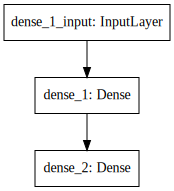

In [33]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

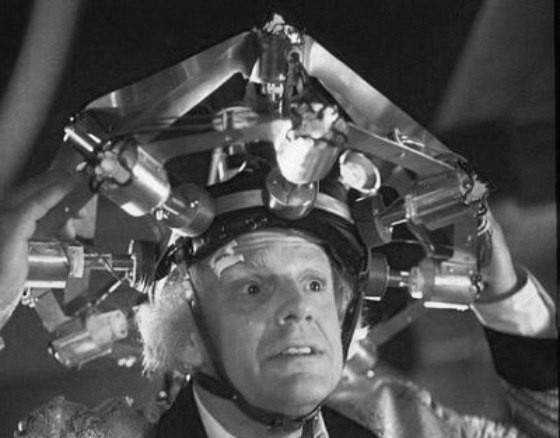

In [34]:
from IPython.display import Image
Image("2379623289.jpg")

Activate The Artifical Neural Network
========

In [35]:
# THIS WILL THROW AN ERROR IF ANY DATA IS MISSING IN THE TRAINING SET

# Fit the model
H = model.fit(XTrain, YTrain, 
              validation_data=(XVal, YVal), epochs=100)

# Save the mean squared errors
TrainMSE = np.array(H.history['mean_squared_error'])
ValMSE = np.array(H.history['val_mean_squared_error'])

Train on 634 samples, validate on 272 samples
Epoch 1/100
634/634 [==============================] - 1s 2ms/step - loss: 2.4821 - mean_squared_error: 0.0991 - val_loss: 1.9786 - val_mean_squared_error: 0.0736
Epoch 2/100
634/634 [==============================] - 0s 258us/step - loss: 1.6120 - mean_squared_error: 0.0770 - val_loss: 1.2129 - val_mean_squared_error: 0.0615
Epoch 3/100
634/634 [==============================] - 0s 259us/step - loss: 0.9328 - mean_squared_error: 0.0634 - val_loss: 0.6365 - val_mean_squared_error: 0.0508
Epoch 4/100
634/634 [==============================] - 0s 265us/step - loss: 0.4471 - mean_squared_error: 0.0526 - val_loss: 0.2583 - val_mean_squared_error: 0.0425
Epoch 5/100
634/634 [==============================] - 0s 258us/step - loss: 0.1651 - mean_squared_error: 0.0411 - val_loss: 0.0920 - val_mean_squared_error: 0.0327
Epoch 6/100
634/634 [==============================] - 0s 286us/step - loss: 0.0735 - mean_squared_error: 0.0318 - val_loss: 0.0543

634/634 [==============================] - 0s 104us/step - loss: 0.0141 - mean_squared_error: 0.0035 - val_loss: 0.0216 - val_mean_squared_error: 0.0112
Epoch 100/100
634/634 [==============================] - 0s 103us/step - loss: 0.0142 - mean_squared_error: 0.0036 - val_loss: 0.0211 - val_mean_squared_error: 0.0109


In [36]:
print(H.history.keys())  

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


Cross Validation Error minimum: 0.010410
Training Error minimum: 0.003527


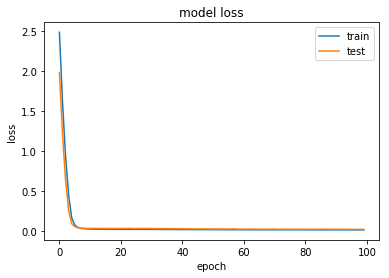

In [37]:
print('Cross Validation Error minimum: %f' % ValMSE.min())
print('Training Error minimum: %f' % TrainMSE.min())

plt.figure() 
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='best') 
plt.show()

Egads! I think I have overfit something!
=====

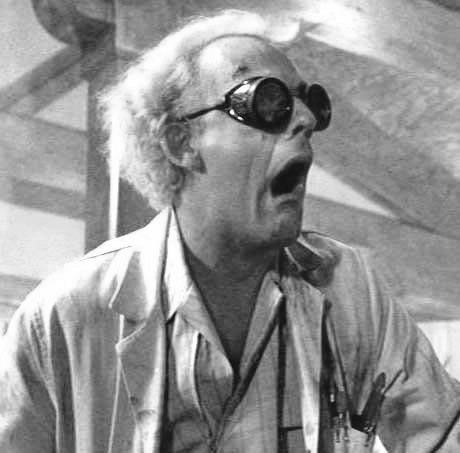

In [41]:
from IPython.display import Image
Image("1631280-doc_brown_full.jpg")

*At this point it seems like I have some serious overfitting going on and perhaps some bias in the data. Results like these make me wonder if perhaps the ETFs are calculated based off of the stocks that I singled out when preparing the data (afterall what else are they calculated from?). I tried searching for the ETFs to find out how they are made; but the answer didn't present itself after a couple of hours of searching. So rather than waiting until I could find out, I am left with a different approach.... *
  -  I could single out the ETF setcor stocks and remove them from the list of stocks and see what I get.

Stage 4: Model Refinement/Evaluation
=========

Now I'm going to carpet bomb the model throwing in *all* of the stocks and meanwhile removing the ETFs and sort it out later. For brevity I am doing all of the previous operations within a couple of cells.

In [39]:
companyInfo= pd.read_pickle('companyInfo.pickle')
weeklyIndicators= pd.read_pickle('weeklyIndicators.pickle')
#Load the Kitchen Sink
Kitchen_Sink = pd.read_pickle('Kitchen_Sink.pickle')
Sect6WeeklyETFS = pd.read_pickle('Sect6WeeklyETFS.pickle')
RUA3000Weekly= pd.read_pickle('RUA3000Weekly.pickle')
#Stocks NOT equal to predefined sectors 
ETFSectors=companyInfo[companyInfo['Sector']!=('Technology' or 'Basic Materials' or 'Consumer Goods' or 'Services' or 'Healthcare' or 'Utilities')]
ETFSectorsList=list(ETFSectors['Symbol'])#Create list of of the stocks


In [40]:
import re
register=[]
for i in Kitchen_Sink.columns.unique():
    register.append(i)
#create a basic dataframe to add results to
results=weeklyIndicators.iloc[:-1].copy()
#for loop using regular expression looking for the names specified above
#Future make a function that does all this in one go with just naming an industry
for i in ETFSectorsList:
    #Fancy footwork here
    IndustryPattern=re.compile(r"'("+i+".*?)'", flags=re.IGNORECASE)
    listMatches=re.findall(IndustryPattern,str(register))
    #add regular expression results to dataframe
    results[listMatches]=Kitchen_Sink[listMatches]
    #print(i,'        ',ETFSectors['CompanyName'][ETFSectors['Symbol']==i][0]) #Don't want to print the results

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [41]:
#Concatenate Stocks,Indicators,and ETFS
limited_results=pd.concat([results,Sect6WeeklyETFS,RUA3000Weekly], axis=1)
#limit the results (as done previously)
limited_results=limited_results[1591:].copy()
#Interpolate the results
NoNullResults=limited_results.astype(float).interpolate(axis=1,method='linear')#Interpolate is a bit of a buggy thing
#split into sets
train, validate, test = train_validate_test_split(NoNullResults)
#Reindex Training
TrainingSet=train.reset_index() #reset the index making 'year' and 'week' column values
TrainingSet=TrainingSet.sort_values(['year', 'week'], ascending=[True, True]) #resorting by values 'year' and 'week'
TrainingSet=TrainingSet.groupby([TrainingSet['year'],TrainingSet['week']]).sum() #reindex using year and week as index again
#Get min and max estimates
TrainMin=TrainingSet.min()
TrainMax=TrainingSet.max()
#Return Normalized Training Set
TrainNorm=featureNormalize(TrainingSet)

#Do the same with validation set
validateSet=validate.copy().reset_index()
validateSet=validateSet.sort_values(['year', 'week'], ascending=[True, True])
validateSet=validateSet.groupby([validateSet['year'],validateSet['week']]).sum()
CrossNorm=(validateSet-TrainMin)/(TrainMax-TrainMin)

Get Training and Validation Estimates

In [42]:
#Get Training and Testing estimates
YTrain=TrainNorm.iloc[:,3205:]
YVal=CrossNorm.iloc[:,3205:]

XTrain=TrainNorm.iloc[:,:3205]
XVal=CrossNorm.iloc[:,:3205]
print("Training Sets")
print("X's training set shape: \n",XTrain.shape)
print("Y's training set shape: \n",YTrain.shape)
print("                                       ")
print("Validation Sets")
print("X's validation set shape: \n",XVal.shape)
print("Y's validation set shape: \n",YVal.shape)

Training Sets
X's training set shape: 
 (634, 3205)
Y's training set shape: 
 (634, 7)
                                       
Validation Sets
X's validation set shape: 
 (272, 3205)
Y's validation set shape: 
 (272, 7)


Build Model

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# Define NN model architecture: we will use the seqential model.
model = Sequential()

# Add the first hidden layer
model.add(Dense(10, input_shape=(3205,), activation='relu',kernel_regularizer=regularizers.l1(0.01),))

# Add the output layer
model.add(Dense(7))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                32060     
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 77        
Total params: 32,137
Trainable params: 32,137
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Fit the model
H = model.fit(XTrain, YTrain, 
              validation_data=(XVal, YVal), epochs=100)

# Save the mean squared errors
TrainMSE = np.array(H.history['mean_squared_error'])
ValMSE = np.array(H.history['val_mean_squared_error'])

Train on 634 samples, validate on 272 samples
Epoch 1/100
634/634 [==============================] - 1s 1ms/step - loss: 4.7146 - mean_squared_error: 0.0489 - val_loss: 4.7678 - val_mean_squared_error: 2.2669
Epoch 2/100
634/634 [==============================] - 0s 348us/step - loss: 1.3515 - mean_squared_error: 0.0155 - val_loss: 0.5835 - val_mean_squared_error: 0.1070
Epoch 3/100
634/634 [==============================] - 0s 290us/step - loss: 0.2963 - mean_squared_error: 0.0069 - val_loss: 0.1803 - val_mean_squared_error: 0.0301
Epoch 4/100
634/634 [==============================] - 0s 330us/step - loss: 0.1131 - mean_squared_error: 0.0102 - val_loss: 0.0937 - val_mean_squared_error: 0.0211
Epoch 5/100
634/634 [==============================] - 0s 248us/step - loss: 0.0729 - mean_squared_error: 0.0105 - val_loss: 0.0690 - val_mean_squared_error: 0.0135
Epoch 6/100
634/634 [==============================] - 0s 268us/step - loss: 0.0626 - mean_squared_error: 0.0096 - val_loss: 0.0637

634/634 [==============================] - 0s 241us/step - loss: 0.0512 - mean_squared_error: 0.0082 - val_loss: 0.0552 - val_mean_squared_error: 0.0120
Epoch 100/100
634/634 [==============================] - 0s 238us/step - loss: 0.0488 - mean_squared_error: 0.0057 - val_loss: 0.0522 - val_mean_squared_error: 0.0104


Cross Validation Error minimum: 0.006472
Training Error minimum: 0.005103


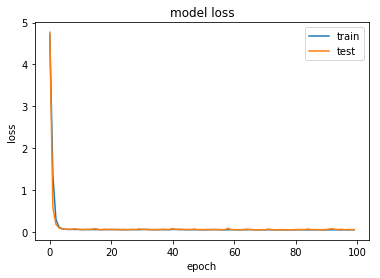

In [46]:
print('Cross Validation Error minimum: %f' % ValMSE.min())
print('Training Error minimum: %f' % TrainMSE.min())

plt.figure() 
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='best') 
plt.show()

In [12]:
predTrain = model.predict(XTrain)
predVal = model.predict(XVal)

In [49]:
YTrain.columns

Index(['Technology (IYW)', 'Basic Materials (IYM)', 'Consumer Goods (IYK)',
       'Services (IYC)', 'Healthcare (IYH)', 'Utilities (IDU)'],
      dtype='object')

In [20]:
print(H.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


In [72]:
pd.DataFrame(predTrain).head()

,0,1,2,3,4,5
0,0.354533,0.386403,0.388264,0.346867,0.344450,0.391181
1,0.319569,0.358568,0.347315,0.307503,0.308332,0.356711
2,0.368664,0.395282,0.403919,0.361193,0.356629,0.403864
3,0.367090,0.391024,0.400942,0.357416,0.351939,0.400732
4,0.333779,0.368900,0.363795,0.323322,0.322581,0.370894


In [73]:
pd.DataFrame(predVal).head()

,0,1,2,3,4,5
0,0.187506,0.361579,0.265619,0.304742,0.370639,0.390563
1,0.374941,0.399779,0.411034,0.367819,0.362475,0.409633
2,0.374818,0.399793,0.411064,0.368057,0.362825,0.410010
3,0.355717,0.386374,0.389251,0.347477,0.344593,0.391728
4,0.313880,0.355412,0.340609,0.300726,0.302310,0.349951
